# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.272638e+01     1.518036e+01
 * time: 0.003657102584838867
     1     6.224281e+01     1.074936e+01
 * time: 0.010432958602905273
     2     5.854911e+01     1.416731e+01
 * time: 0.02576613426208496
     3     4.098401e+01     9.078621e+00
 * time: 0.04626011848449707
     4     3.075076e+01     6.840545e+00
 * time: 0.06648898124694824
     5     2.211246e+01     5.322373e+00
 * time: 0.08403801918029785
     6     1.778760e+01     5.067847e+00
 * time: 0.15813398361206055
     7     1.652966e+01     5.007127e+00
 * time: 0.17071914672851562
     8     9.757402e+00     3.853621e+00
 * time: 0.18559813499450684
     9     7.453499e+00     2.485963e+00
 * time: 0.20047807693481445
    10     6.735804e+00     1.695463e+00
 * time: 0.21515393257141113
    11     6.565001e+00     3.774584e+00
 * time: 0.2272019386291504
    12     6.349480e+00     2.422030e+00
 * time: 0.2389969825744629
    13     6.020031e+00     1.632141e+00
 * time:

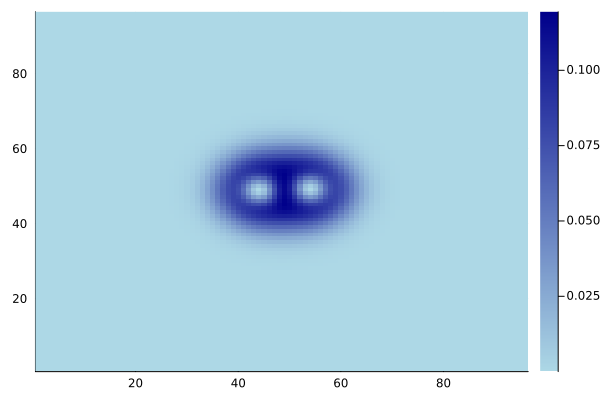

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)